In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#import matplotlib;matplotlib.rcParams['figure.figsize'] = (8,5)
# pip install Gpy
import GPy

# 1-dimensional model

We assume we have the following inputs and outputs

In [2]:
X = np.random.uniform(-3.,3.,(20,1))
Y = np.sin(X) + np.random.randn(20,1)*0.05

The first step is to define the covariance kernel we want to use for the model. We choose here a kernel based on Gaussian kernel (i.e. rbf or square exponential):

In [3]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=200.)

In [4]:
kernel

rbf.,value,constraints,priors
variance,1.0,+ve,
lengthscale,200.0,+ve,


In [5]:
#type GPy.kern.<tab> here:
# GPy.kern.BasisFuncKernel?

The inputs required for building the model are the observations and the kernel:

In [6]:
m = GPy.models.GPRegression(X,Y,kernel)

By default, some observation noise is added to the model. The functions display and plot give an insight of the model we have just built:

In [7]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,200.0,+ve,
Gaussian_noise.variance,1.0,+ve,


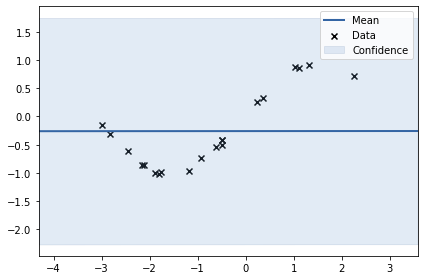

In [12]:
fig = m.plot()
# GPy.plotting.show(fig, filename='Gaussian process regression')

The above cell shows our GP regression model before optimization of the parameters. The shaded region corresponds to ~95% confidence intervals (ie +/- 2 standard deviation).

The default values of the kernel parameters may not be optimal for the current data (for example, the confidence intervals seems too wide on the previous figure). A common approach is to find the values of the parameters that maximize the likelihood of the data. It as easy as calling m.optimize in GPy:

The log marginal likelihood of the model, p(y), this is the objective function of the model being optimised

https://gpy.readthedocs.io/en/deploy/GPy.core.html

In [13]:
m.optimize(messages=True)

If we want to perform some restarts to try to improve the result of the optimization, we can use the optimize_restarts function. This selects random (drawn from $N(0,1)$) initializations for the parameter values, optimizes each, and sets the model to the best solution found.

In [27]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 21.41230591248975
Optimization restart 2/10, f = -21.009641330897253
Optimization restart 3/10, f = -21.009641331973704
Optimization restart 4/10, f = -21.00964133197065
Optimization restart 5/10, f = -21.00964133197104
Optimization restart 6/10, f = -21.00964133196949
Optimization restart 7/10, f = -21.009641331961976
Optimization restart 8/10, f = -21.009641331511677
Optimization restart 9/10, f = -21.009641331974063
Optimization restart 10/10, f = -21.0096413319734


In this simple example, the objective function (usually!) has only one local minima, and each of the found solutions are the same.

Once again, we can use print(m) and m.plot() to look at the resulting model resulting model. This time, the paraemters values have been optimized agains the log likelihood (aka the log marginal likelihood): the fit shoul dbe much better.

GP_regression.,value,constraints,priors
rbf.variance,0.5651349816565991,+ve,
rbf.lengthscale,1.5146008501290478,+ve,
Gaussian_noise.variance,0.0012074945519108416,+ve,


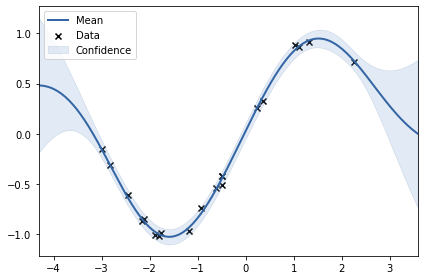

In [30]:
display(m)
fig = m.plot()
# GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')

{'covariance': [[<matplotlib.lines.Line2D at 0x1d9e116e1f0>]]}

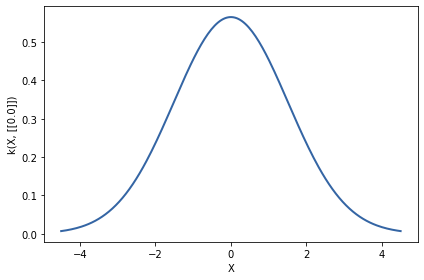

In [31]:
kernel.plot()

# 2-dimensional example

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.4191992335087138,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.000698532990654776,+ve,
Gaussian_noise.variance,0.000698532990654776,+ve,


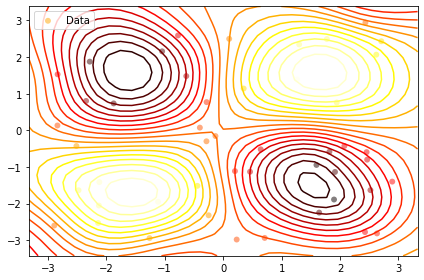

In [36]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# ker = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=200.)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
# display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)

{'covariance': [<matplotlib.contour.QuadContourSet at 0x1d9e261d880>]}

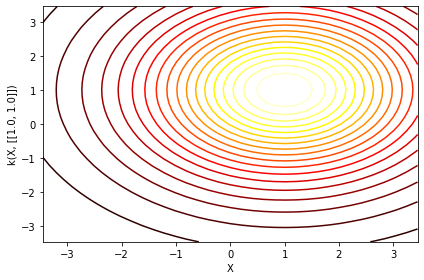

In [37]:
ker.plot()

In [39]:
m

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.4191992335087138,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.000698532990654776,+ve,
Gaussian_noise.variance,0.000698532990654776,+ve,


# Plotting kernels

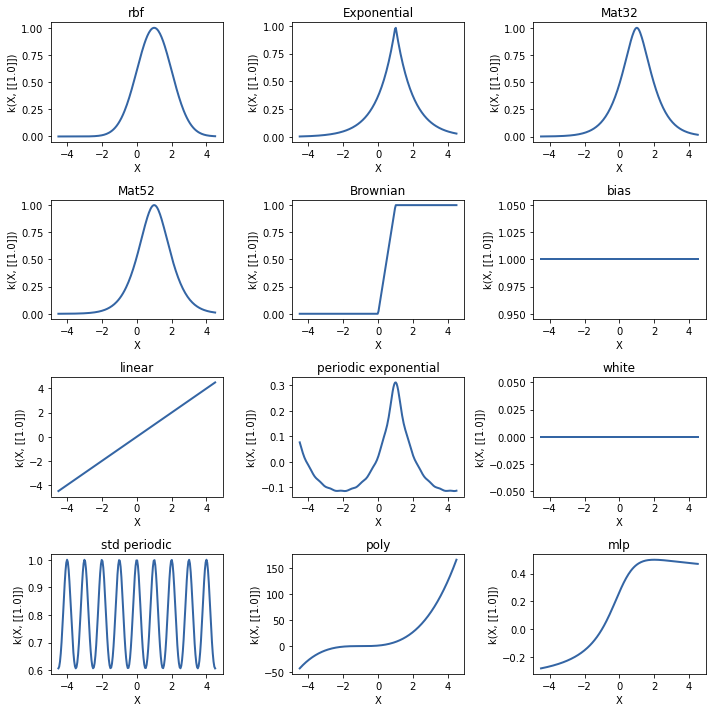

In [45]:
figure, axes = plt.subplots(4,3, figsize=(10,10), tight_layout=True)
kerns = [GPy.kern.RBF(1), GPy.kern.Exponential(1), GPy.kern.Matern32(1), 
         GPy.kern.Matern52(1), GPy.kern.Brownian(1),GPy.kern.Bias(1), 
         GPy.kern.Linear(1), GPy.kern.PeriodicExponential(1), GPy.kern.White(1), 
         GPy.kern.StdPeriodic(1), GPy.kern.Poly(1), GPy.kern.MLP(1)]

for k,a in zip(kerns, axes.flatten()):
    k.plot(ax=a, x=1)
    a.set_title(k.name.replace('_', ' '))